# Script to read in 2 data sets and compare them

Note: will get nonsense unless the two have the same number of galaxies

In [22]:
# Imports
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font',size=20)

In [23]:
# Parameters
outputDir='../../output/'
dataSet1='DGS'
dataSet2='new'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=5
lastFile=5
property='DustISM_elements'
ndim=11
#logplot=False
logplot=True

In [28]:
# Read in first data set
dataDir=outputDir+dataSet1+'/'
# First determine the size of the arrays that we need to hold the data
nGal1=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(dataDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal1+=len(f[snap])
print('nGal1=',nGal1)

# Declare numpy arrays to hold the data
StellarMass1=np.empty(nGal1)
Prop1=np.empty([nGal1,ndim])

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(dataDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        StellarMass1[iGal:iGal+nGalFile]=f[snap]['StellarMass']
        Prop1[iGal:iGal+nGalFile,:]=f[snap][property]
        iGal+=nGalFile
        
# Read in second data set
dataDir=outputDir+dataSet2+'/'
# First determine the size of the arrays that we need to hold the data
nGal2=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(dataDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal2+=len(f[snap])
print('nGal2=',nGal2)

# Declare numpy arrays to hold the data
StellarMass2=np.empty(nGal1)
Prop2=np.empty([nGal2,ndim])

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(dataDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        StellarMass2[iGal:iGal+nGalFile]=f[snap]['StellarMass']
        Prop2[iGal:iGal+nGalFile,:]=f[snap][property]
        iGal+=nGalFile
        
# In the case where we have an array, sum over array
if (ndim>1):
    Prop1=np.sum(Prop1,1)
    Prop2=np.sum(Prop2,1)

nGal1= 45586
nGal2= 45586


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'DustISM_elements vs StellarMass')

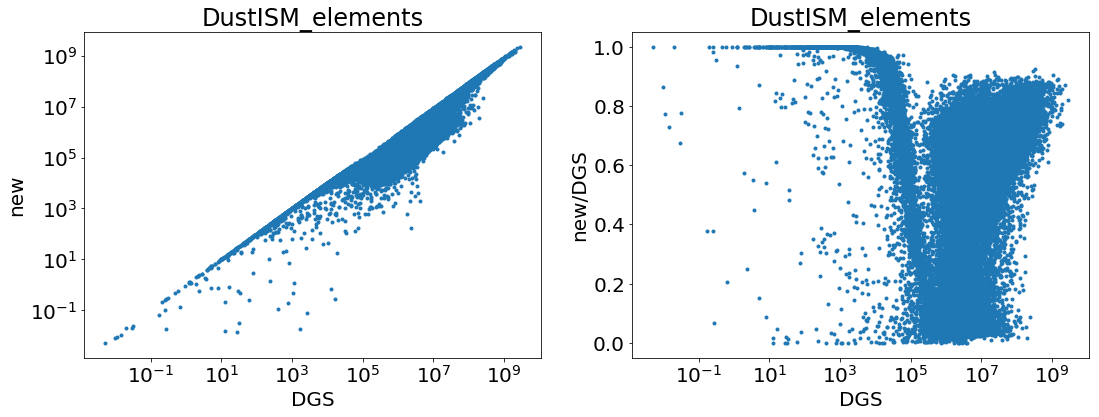

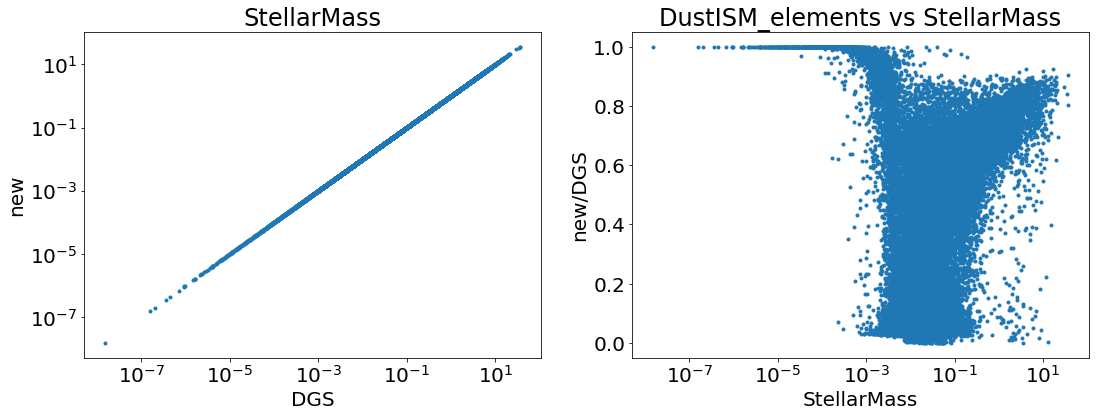

In [29]:
# Plot the two properties agains one another (only really makes sense if galaxy numbers are equal)
plt.figure(0,figsize=(18,6))
plt.subplot(1,2,1)
if logplot:
    plt.loglog(Prop1,Prop2,'.')
else:
    plt.plot(Prop1,Prop2,'.')
plt.xlabel(dataSet1)
plt.ylabel(dataSet2)
plt.title(property)
plt.subplot(1,2,2)
if logplot:
    plt.semilogx(Prop1,Prop2/Prop1,'.')
    plt.ylabel(dataSet2+'/'+dataSet1)
else:
    plt.semilogx(Prop1,Prop2-Prop1,'.')
    plt.ylabel(dataSet2+'-'+dataSet1)
plt.xlabel(dataSet1)
plt.title(property)

plt.figure(1,figsize=(18,6))
plt.subplot(1,2,1)
if logplot:
    plt.loglog(StellarMass1,StellarMass2,'.')
else:
    plt.plot(StellarMass1,StellarMass2,'.')
plt.xlabel(dataSet1)
plt.ylabel(dataSet2)
plt.title('StellarMass')
plt.subplot(1,2,2)
if logplot:
    plt.semilogx(StellarMass1,Prop2/Prop1,'.')
    plt.ylabel(dataSet2+'/'+dataSet1)
else:
    plt.semilogx(StellarMass1,Prop2-Prop1,'.')
    plt.ylabel(dataSet2+'-'+dataSet1)
plt.xlabel('StellarMass')
plt.title(property+' vs StellarMass')

523291647.0